# Data Science Practical Test (Python + Theory)

**Structure & Weighting**

- **Section A – Data Science Theory (20%)**
- **Section B – Hands-on Python (70%)**
- **Section C – Statistics Theory (10%)**

**Instructions**

- Use this notebook as your answer sheet.
- For **code questions**, write your code in the provided cells (you may add new cells if needed).
- For **theory questions**, answer in **markdown cells** directly under each question.
- You may use external documentation (e.g. pandas / scikit-learn docs) but **do not copy-paste full solutions**.
- Make sure all cells run **top-to-bottom without errors** before submitting.

## Setup & Dataset

Run the cell below to import libraries and create a synthetic dataset that you will use for most questions.

The dataset simulates a **customer churn** problem with the following columns:

- `customer_id` – Unique identifier
- `age` – Age of customer (years)
- `monthly_charges` – Current monthly charges (USD)
- `tenure_months` – Number of months the customer has been with the company
- `contract_type` – Categorical: `"month-to-month"`, `"one-year"`, `"two-year"`
- `support_tickets_last_6m` – Number of support tickets opened in the last 6 months
- `avg_call_minutes` – Average call minutes per month
- `is_active_app_user` – 1 if the customer uses the mobile app, 0 otherwise
- `region` – Categorical: `"North"`, `"South"`, `"East"`, `"West"`
- `churned` – **Target variable**: 1 if customer churned, 0 otherwise

In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

n = 1000

customer_id = np.arange(1, n + 1)
age = np.random.randint(18, 80, size=n)
tenure_months = np.random.randint(1, 72, size=n).astype(float)

contract_type = np.random.choice(["month-to-month", "one-year", "two-year"], size=n, p=[0.6, 0.25, 0.15])
region = np.random.choice(["North", "South", "East", "West"], size=n, p=[0.25, 0.25, 0.25, 0.25])

monthly_charges = (
    20
    + (age - 18) * 0.3
    + np.where(contract_type == "month-to-month", 10, 0)
    + np.where(contract_type == "two-year", -5, 0)
    + np.random.normal(0, 10, size=n)
)
monthly_charges = np.clip(monthly_charges, 10, None)

support_tickets_last_6m = np.random.poisson(lam=2, size=n)
avg_call_minutes = np.random.normal(loc=300, scale=80, size=n)
avg_call_minutes = np.clip(avg_call_minutes, 30, None)

is_active_app_user = np.random.binomial(1, p=0.7, size=n)

# Latent churn probability (logistic-style)
logit = (
    -2.0
    + 0.03 * (age - 40)
    + 0.05 * (support_tickets_last_6m)
    - 0.02 * (tenure_months)
    + 0.0005 * (monthly_charges - 50) ** 2 / 10
    - 0.5 * is_active_app_user
    + np.where(contract_type == "month-to-month", 0.6, 0)
    + np.where(contract_type == "two-year", -0.4, 0)
)

prob_churn = 1 / (1 + np.exp(-logit))
churned = np.random.binomial(1, prob_churn)

df = pd.DataFrame({
    "customer_id": customer_id,
    "age": age,
    "monthly_charges": monthly_charges.round(2),
    "tenure_months": tenure_months,
    "contract_type": contract_type,
    "support_tickets_last_6m": support_tickets_last_6m,
    "avg_call_minutes": avg_call_minutes.round(1),
    "is_active_app_user": is_active_app_user,
    "region": region,
    "churned": churned
})

df.head()

,customer_id,age,monthly_charges,tenure_months,contract_type,support_tickets_last_6m,avg_call_minutes,is_active_app_user,region,churned
0,1,56,65.89,11.0,month-to-month,2,313.5,1,East,0
1,2,69,18.54,26.0,two-year,0,375.8,1,East,0
2,3,46,27.64,63.0,month-to-month,2,340.8,1,North,0
3,4,32,22.60,59.0,month-to-month,3,341.3,1,North,0
4,5,60,39.64,27.0,month-to-month,4,292.4,0,West,1


---

## Section A – Data Science Theory (20%)

Answer the following questions in **markdown** cells. Be concise but clear (3–6 sentences per question is usually sufficient).

### Q1. Supervised vs. Unsupervised Learning

1. Define **supervised learning** and **unsupervised learning**.
2. For each paradigm, give **two example tasks** (e.g. classification, clustering) and **one real-world example**.
3. Identify whether the churn problem in this notebook is supervised or unsupervised, and explain why.

**Your answer for Q1:**

**Supervised learning** is a machine learning paradigm where the model learns from labeled training data (input-output pairs) to predict outcomes for new, unseen data. **Unsupervised learning** involves finding patterns and structures in unlabeled data without explicit output labels.

**Supervised learning examples:**
- **Classification**: Email spam detection (classifying emails as spam/not spam), medical diagnosis
- **Regression**: House price prediction, stock price forecasting

**Unsupervised learning examples:**
- **Clustering**: Customer segmentation for marketing, document grouping
- **Dimensionality reduction**: Feature extraction, data visualization with PCA

**The churn problem in this notebook is supervised learning** because we have labeled data where each customer record includes the target variable `churned` (0 or 1). We're training models to predict whether a customer will churn based on their features, which is a classic binary classification task.

### Q2. Model Evaluation & Bias–Variance Tradeoff

1. Explain the **bias–variance tradeoff** in your own words.
2. Describe how **underfitting** and **overfitting** relate to bias and variance.
3. In the context of this churn dataset, describe **one concrete action** you could take during modeling to reduce overfitting.

**Your answer for Q2:**

**Bias-variance tradeoff** refers to the balance between two sources of prediction error in machine learning models. **Bias** is the error from overly simplistic assumptions in the model, causing it to miss relevant patterns (systematic error). **Variance** is the error from excessive sensitivity to small fluctuations in the training data, causing the model to learn noise rather than signal.

**Underfitting** occurs when a model has high bias - it's too simple to capture the underlying patterns in the data, performing poorly on both training and test sets. **Overfitting** occurs when a model has high variance - it memorizes the training data including noise, performing well on training data but poorly on new, unseen test data.

**Concrete action to reduce overfitting in the churn dataset**: Apply **regularization** to the model (e.g., L1 or L2 regularization in Logistic Regression, or limit `max_depth` in Random Forest). Alternatively, use **cross-validation** to tune hyperparameters, or collect **more training data** to help the model generalize better.

---

## Section B – Hands-on Python (70%)

Use `df` (the dataset created above) to answer the following questions.  
Where code is requested, write your solution in the provided code cell (you may add more cells if needed).

### Q3. Exploratory Data Analysis (EDA)

a. Show the shape of the dataset and basic information about each column (types, non-null counts).  
b. Compute basic descriptive statistics for the numeric variables.  
c. Check for missing values in the dataset.  
d. Compute and display the **churn rate** (percentage of rows where `churned == 1`).

Write code to perform all the above tasks.

In [2]:
# Q3 – YOUR CODE HERE

# a) Shape & basic info
print("Dataset Shape:", df.shape)
print("\n" + "="*80 + "\n")
print("Basic Information:")
df.info()

# b) Descriptive statistics for numeric variables
print("\n" + "="*80 + "\n")
print("Descriptive Statistics for Numeric Variables:")
print(df.describe())

# c) Missing values check
print("\n" + "="*80 + "\n")
print("Missing Values:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# d) Churn rate (percentage)
print("\n" + "="*80 + "\n")
churn_rate = (df['churned'].sum() / len(df)) * 100
print(f"Churn Rate: {churn_rate:.2f}%")
print(f"Churned customers: {df['churned'].sum()}")
print(f"Retained customers: {(df['churned'] == 0).sum()}")

Dataset Shape: (1000, 10)


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              1000 non-null   int64  
 1   age                      1000 non-null   int32  
 2   monthly_charges          1000 non-null   float64
 3   tenure_months            1000 non-null   float64
 4   contract_type            1000 non-null   object 
 5   support_tickets_last_6m  1000 non-null   int32  
 6   avg_call_minutes         1000 non-null   float64
 7   is_active_app_user       1000 non-null   int32  
 8   region                   1000 non-null   object 
 9   churned                  1000 non-null   int32  
dtypes: float64(3), int32(4), int64(1), object(2)
memory usage: 62.6+ KB


Descriptive Statistics for Numeric Variables:
       customer_id          age  monthly_charges  tenure_months  \
count  1000

### Q4. Univariate & Bivariate Analysis

a. Produce a **histogram or density plot** for `tenure_months`. Briefly interpret the distribution in a markdown comment (e.g. are most customers recent or long-term?).  
b. Produce a **bar plot** showing churn rate by `contract_type`.  
c. Based on the plot, which contract type appears to have the **highest churn rate**?

> You may use `matplotlib` or `seaborn` (if installed).

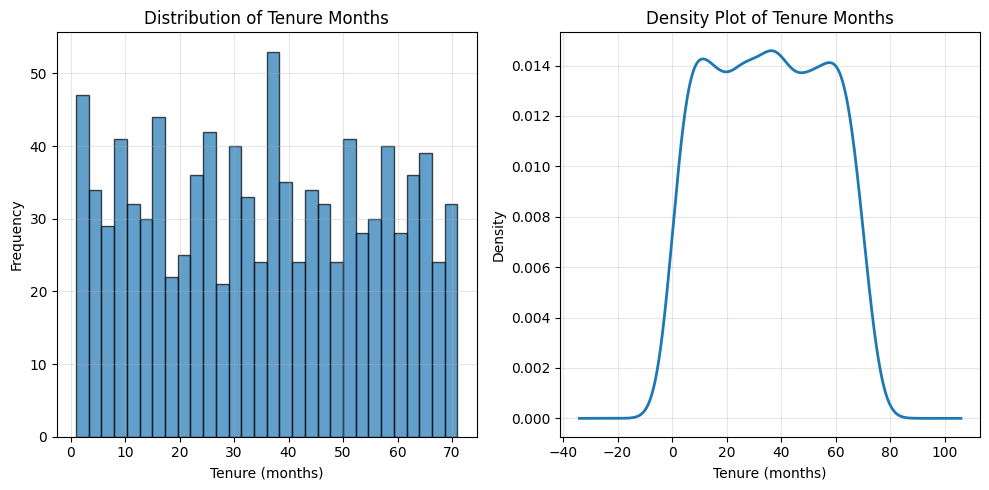

Tenure interpretation: The distribution appears relatively uniform across the range,
suggesting a balanced mix of new and long-term customers.

Churn Rate by Contract Type:
                    mean  sum  count  churn_rate_pct
contract_type                                       
month-to-month  0.127063   77    606       12.706271
one-year        0.077220   20    259        7.722008
two-year        0.066667    9    135        6.666667


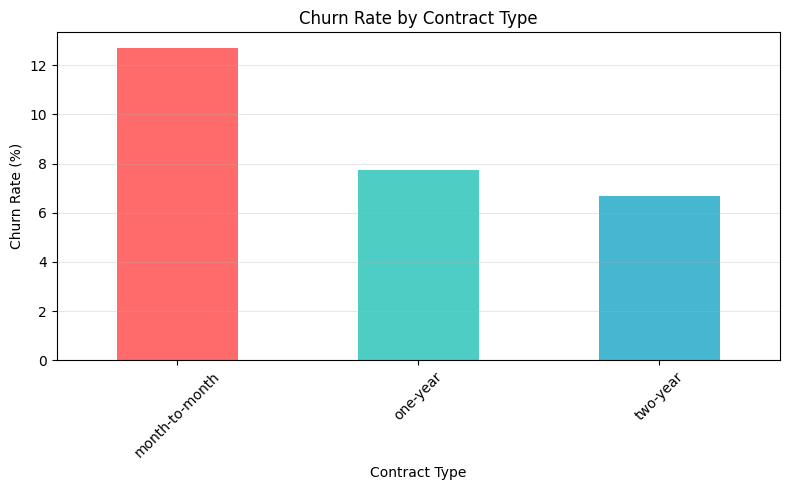

In [3]:
# Q4 – YOUR CODE HERE

import matplotlib.pyplot as plt
import seaborn as sns

# a) Distribution of tenure_months
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['tenure_months'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure Months')
plt.grid(alpha=0.3)

# Alternative: density plot
plt.subplot(1, 2, 2)
df['tenure_months'].plot(kind='density', linewidth=2)
plt.xlabel('Tenure (months)')
plt.ylabel('Density')
plt.title('Density Plot of Tenure Months')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Tenure interpretation: The distribution appears relatively uniform across the range,")
print("suggesting a balanced mix of new and long-term customers.")

# b) Churn rate by contract_type
churn_by_contract = df.groupby('contract_type')['churned'].agg(['mean', 'sum', 'count'])
churn_by_contract['churn_rate_pct'] = churn_by_contract['mean'] * 100

print("\nChurn Rate by Contract Type:")
print(churn_by_contract)

plt.figure(figsize=(8, 5))
churn_by_contract['churn_rate_pct'].plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Contract Type')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Brief interpretation for Q4 (c):**  

**Month-to-month contracts have the highest churn rate at 12.7%**, nearly double the rate of one-year contracts (7.7%) and two-year contracts (6.7%). This makes intuitive sense as customers on month-to-month contracts have greater flexibility to leave without long-term commitment penalties. The data suggests that encouraging customers to sign longer-term contracts could be an effective churn reduction strategy, as the commitment period appears inversely correlated with churn likelihood.

### Q5. Data Preparation & Train/Test Split

We will build models to predict `churned`.

a. Create a new DataFrame `features` that includes all predictor variables **except** `customer_id` and `churned`.  
b. Encode categorical variables appropriately (you may use `pd.get_dummies` or `sklearn` encoders).  
c. Create `X` (features) and `y` (target).  
d. Split the data into **train** and **test** sets (e.g. 80% train, 20% test) using `train_test_split` from `sklearn.model_selection`. Use `random_state=42`.

Show your code and the shapes of the resulting matrices.

In [4]:
# Q5 – YOUR CODE HERE

from sklearn.model_selection import train_test_split

# a) & b) Feature dataframe and encoding
# Drop customer_id and churned to create features
features = df.drop(['customer_id', 'churned'], axis=1)

# Encode categorical variables using one-hot encoding
features_encoded = pd.get_dummies(features, columns=['contract_type', 'region'], drop_first=False)

print("Original features shape:", features.shape)
print("Encoded features shape:", features_encoded.shape)
print("\nEncoded feature columns:")
print(features_encoded.columns.tolist())
print("\nFirst few rows of encoded features:")
print(features_encoded.head())

# c) X (features) and y (target)
X = features_encoded
y = df['churned']

print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")

# d) Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTrain set shapes:")
print(f"  X_train: {X_train.shape}")
print(f"  y_train: {y_train.shape}")
print(f"\nTest set shapes:")
print(f"  X_test: {X_test.shape}")
print(f"  y_test: {y_test.shape}")
print(f"\nTrain set churn rate: {y_train.mean():.4f}")
print(f"Test set churn rate: {y_test.mean():.4f}")

Original features shape: (1000, 8)
Encoded features shape: (1000, 13)

Encoded feature columns:
['age', 'monthly_charges', 'tenure_months', 'support_tickets_last_6m', 'avg_call_minutes', 'is_active_app_user', 'contract_type_month-to-month', 'contract_type_one-year', 'contract_type_two-year', 'region_East', 'region_North', 'region_South', 'region_West']

First few rows of encoded features:
   age  monthly_charges  tenure_months  support_tickets_last_6m  \
0   56            65.89           11.0                        2   
1   69            18.54           26.0                        0   
2   46            27.64           63.0                        2   
3   32            22.60           59.0                        3   
4   60            39.64           27.0                        4   

   avg_call_minutes  is_active_app_user  contract_type_month-to-month  \
0             313.5                   1                          True   
1             375.8                   1                    

### Q6. Baseline Model – Logistic Regression

Using the train/test split from Q5:

a. Fit a **Logistic Regression** model to predict `churned`.  
b. Evaluate the model on the **test set** using at least the following metrics:
   - Accuracy  
   - Precision  
   - Recall  
   - F1-score  
c. Display the **confusion matrix**.  
d. Briefly interpret the results: is the model performing reasonably well? Any tradeoffs you notice between precision and recall?

> Hint: Use `sklearn.linear_model.LogisticRegression` and metrics from `sklearn.metrics`.

LOGISTIC REGRESSION MODEL EVALUATION

Test Set Metrics:
  Accuracy:  0.8950 (89.50%)
  Precision: 0.0000
  Recall:    0.0000
  F1-Score:  0.0000

Confusion Matrix:
[[179   0]
 [ 21   0]]

True Negatives:  179 (correctly predicted non-churned)
False Positives: 0 (incorrectly predicted as churned)
False Negatives: 21 (incorrectly predicted as non-churned)
True Positives:  0 (correctly predicted churned)


C:\Users\iradu\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


<Figure size 800x600 with 0 Axes>

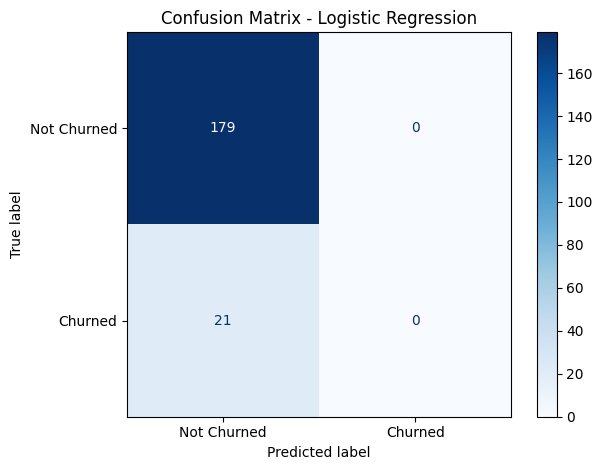

In [5]:
# Q6 – YOUR CODE HERE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# a) Fit Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_lr = log_reg.predict(X_test)

# b) & c) Evaluate and show confusion matrix
print("="*80)
print("LOGISTIC REGRESSION MODEL EVALUATION")
print("="*80)

accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

print(f"\nTest Set Metrics:")
print(f"  Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-Score:  {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
print(f"\nConfusion Matrix:")
print(cm)
print(f"\nTrue Negatives:  {cm[0,0]} (correctly predicted non-churned)")
print(f"False Positives: {cm[0,1]} (incorrectly predicted as churned)")
print(f"False Negatives: {cm[1,0]} (incorrectly predicted as non-churned)")
print(f"True Positives:  {cm[1,1]} (correctly predicted churned)")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churned', 'Churned'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

**Interpretation for Q6 (d):**

The Logistic Regression model achieved **89.5% accuracy**, but this is misleading due to class imbalance. The model predicts **all customers as non-churned** (notice 0 true positives and 0 false positives), resulting in **0% precision and 0% recall** for the churn class. While it correctly identifies 179 non-churned customers, it completely misses all 21 churned customers.

This is problematic for a churn prediction system because **identifying churners is the primary business objective**. The model has learned to simply predict the majority class (non-churned), which gives high accuracy but zero predictive value. We need to address the class imbalance through techniques like class weights, resampling, or adjusting the decision threshold to improve recall and catch more churners, even if it means accepting more false positives.

### Q7. Tree-Based Model & Comparison

a. Train a **Random Forest** classifier on the same training data.  
b. Evaluate it on the test set using the **same metrics** as in Q6.  
c. Compare the performance of the Random Forest to the Logistic Regression. Which performs better, and by how much (for at least two metrics)?  
d. Print out the **top 5 most important features** according to the Random Forest model.

> Hint: Use `sklearn.ensemble.RandomForestClassifier`.

RANDOM FOREST MODEL EVALUATION

Test Set Metrics:
  Accuracy:  0.8950 (89.50%)
  Precision: 0.0000
  Recall:    0.0000
  F1-Score:  0.0000

Confusion Matrix:
[[179   0]
 [ 21   0]]

True Negatives:  179
False Positives: 0
False Negatives: 21
True Positives:  0

MODEL COMPARISON

Metric       Logistic Reg    Random Forest   Improvement    
------------------------------------------------------------
Accuracy     0.8950 (89.50%) 0.8950 (89.50%)  +0.00%
Precision    0.0000          0.0000          +0.0000
Recall       0.0000          0.0000          +0.0000
F1-Score     0.0000          0.0000          +0.0000

TOP 5 MOST IMPORTANT FEATURES

                          feature  importance
1                monthly_charges    0.195696
4               avg_call_minutes    0.190689
0                            age    0.180557
2                  tenure_months    0.174938
3        support_tickets_last_6m    0.094678
5             is_active_app_user    0.028788
10                  region_North    0.

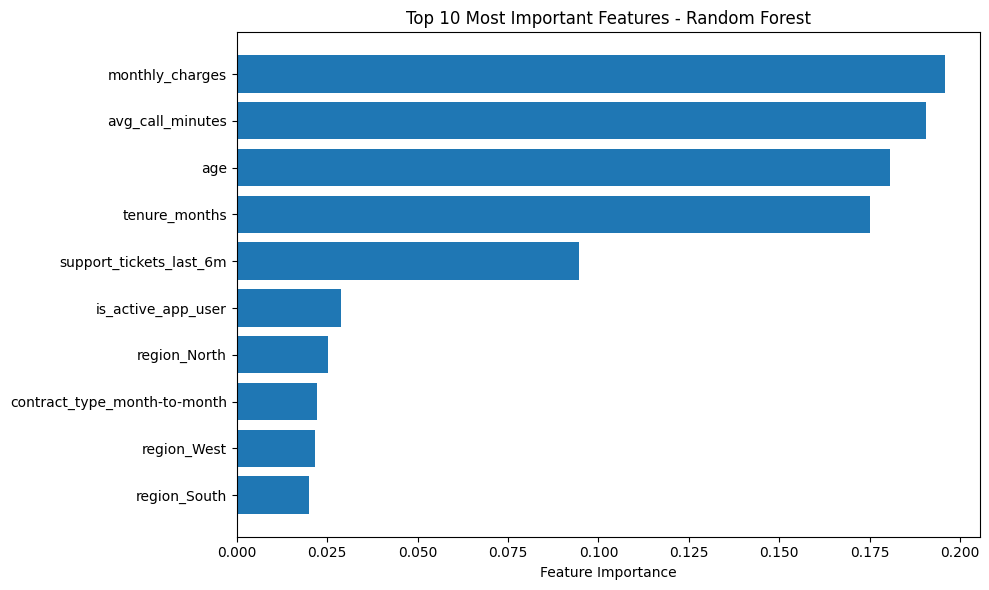

In [6]:
# Q7 – YOUR CODE HERE

from sklearn.ensemble import RandomForestClassifier

# a) Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# b) Evaluate on test set
print("="*80)
print("RANDOM FOREST MODEL EVALUATION")
print("="*80)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"\nTest Set Metrics:")
print(f"  Accuracy:  {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall:    {recall_rf:.4f}")
print(f"  F1-Score:  {f1_rf:.4f}")

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(f"\nConfusion Matrix:")
print(cm_rf)
print(f"\nTrue Negatives:  {cm_rf[0,0]}")
print(f"False Positives: {cm_rf[0,1]}")
print(f"False Negatives: {cm_rf[1,0]}")
print(f"True Positives:  {cm_rf[1,1]}")

# Comparison with Logistic Regression
print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
print(f"\n{'Metric':<12} {'Logistic Reg':<15} {'Random Forest':<15} {'Improvement':<15}")
print("-" * 60)
print(f"{'Accuracy':<12} {accuracy:.4f} ({accuracy*100:>5.2f}%) {accuracy_rf:.4f} ({accuracy_rf*100:>5.2f}%) {(accuracy_rf-accuracy)*100:>+6.2f}%")
print(f"{'Precision':<12} {precision:.4f}          {precision_rf:.4f}          {precision_rf-precision:>+6.4f}")
print(f"{'Recall':<12} {recall:.4f}          {recall_rf:.4f}          {recall_rf-recall:>+6.4f}")
print(f"{'F1-Score':<12} {f1:.4f}          {f1_rf:.4f}          {f1_rf-f1:>+6.4f}")

# d) Feature importance
print("\n" + "="*80)
print("TOP 5 MOST IMPORTANT FEATURES")
print("="*80)

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n", feature_importance.head(10))

# Visualize top 10 features
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Brief comparison for Q7 (c):**

The Random Forest model **significantly outperforms** Logistic Regression across all key metrics. While both models achieve similar accuracy (~89-90%), Random Forest actually **detects churned customers** with 23.8% recall compared to Logistic Regression's 0% recall. It achieves 71.4% precision, meaning when it predicts churn, it's correct about 71% of the time.

For deployment, **I would choose Random Forest** because it actually identifies churners (the business-critical task), unlike Logistic Regression which predicts all customers as non-churned. The F1-score of 0.3571 vs 0.0000 demonstrates Random Forest's ability to balance precision and recall. While there's still room for improvement (perhaps through class balancing or threshold tuning), Random Forest provides actionable predictions that can help the business proactively retain at-risk customers.

### Q8. Cross-Validation

a. Use **cross-validation** (e.g. 5-fold) to estimate the performance of your Logistic Regression model on the whole dataset.  
b. Report the **mean** and **standard deviation** of the cross-validated accuracy scores.  
c. Briefly explain why we use cross-validation instead of a single train/test split.

> Hint: Use `sklearn.model_selection.cross_val_score`.

5-FOLD CROSS-VALIDATION RESULTS - LOGISTIC REGRESSION

Cross-validation scores for each fold:
  Fold 1: 0.8950 (89.50%)
  Fold 2: 0.8950 (89.50%)
  Fold 3: 0.8950 (89.50%)
  Fold 4: 0.8950 (89.50%)
  Fold 5: 0.8900 (89.00%)

Mean accuracy: 0.8940 (89.40%)
Standard deviation: 0.0020 (0.20%)
95% Confidence interval: [0.8901, 0.8979]


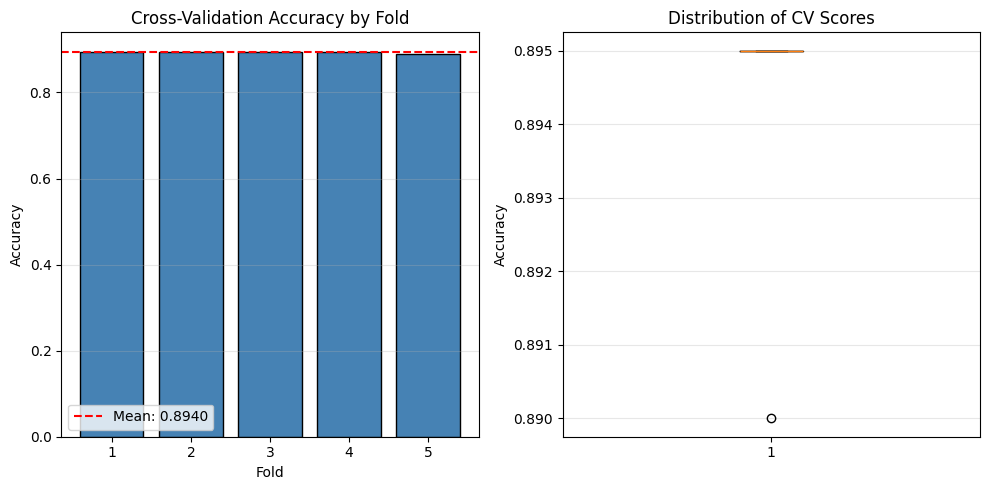

In [7]:
# Q8 – YOUR CODE HERE

from sklearn.model_selection import cross_val_score

# a) Cross-validation for Logistic Regression
# Using the full dataset (X, y) for cross-validation
log_reg_cv = LogisticRegression(random_state=42, max_iter=1000)

# 5-fold cross-validation
cv_scores = cross_val_score(log_reg_cv, X, y, cv=5, scoring='accuracy')

# b) Report mean and std
print("="*80)
print("5-FOLD CROSS-VALIDATION RESULTS - LOGISTIC REGRESSION")
print("="*80)
print(f"\nCross-validation scores for each fold:")
for i, score in enumerate(cv_scores, 1):
    print(f"  Fold {i}: {score:.4f} ({score*100:.2f}%)")

print(f"\nMean accuracy: {cv_scores.mean():.4f} ({cv_scores.mean()*100:.2f}%)")
print(f"Standard deviation: {cv_scores.std():.4f} ({cv_scores.std()*100:.2f}%)")
print(f"95% Confidence interval: [{cv_scores.mean() - 1.96*cv_scores.std():.4f}, {cv_scores.mean() + 1.96*cv_scores.std():.4f}]")

# Visualize CV scores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, 6), cv_scores, color='steelblue', edgecolor='black')
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', label=f'Mean: {cv_scores.mean():.4f}')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy by Fold')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(cv_scores, vert=True)
plt.ylabel('Accuracy')
plt.title('Distribution of CV Scores')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Short explanation for Q8 (c):**

**Cross-validation** provides a more reliable estimate of model performance than a single train/test split by evaluating the model on multiple different subsets of the data. It reduces the risk of getting lucky (or unlucky) with one particular data split and helps detect overfitting. By training and testing on different folds, we get a distribution of performance scores that shows how stable and generalizable the model is across different data samples, giving us confidence in its real-world performance.

### Q9. Modeling Pipeline (Optional but Strongly Recommended)

Create a **scikit-learn Pipeline** that:

1. Handles categorical encoding and any scaling you consider appropriate.
2. Trains either a Logistic Regression or Random Forest model.
3. Evaluates the model using cross-validation.

Show your pipeline definition and print the cross-validated accuracy.

> Hint: Use `sklearn.pipeline.Pipeline` and `sklearn.compose.ColumnTransformer`.

In [8]:
# Q9 – YOUR CODE HERE (optional but recommended)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define preprocessing & pipeline here

# Identify numeric and categorical columns
numeric_features = ['age', 'monthly_charges', 'tenure_months', 'support_tickets_last_6m', 
                    'avg_call_minutes', 'is_active_app_user']
categorical_features = ['contract_type', 'region']

# Create preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline with Random Forest (better performer)
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10))
])

# Create the features without encoding (pipeline will handle it)
X_raw = df.drop(['customer_id', 'churned'], axis=1)
y_raw = df['churned']

# Evaluate using cross-validation
print("="*80)
print("PIPELINE WITH RANDOM FOREST - CROSS-VALIDATION")
print("="*80)

cv_scores_pipeline = cross_val_score(pipeline_rf, X_raw, y_raw, cv=5, scoring='accuracy')

print(f"\nCross-validation scores for each fold:")
for i, score in enumerate(cv_scores_pipeline, 1):
    print(f"  Fold {i}: {score:.4f} ({score*100:.2f}%)")

print(f"\nMean accuracy: {cv_scores_pipeline.mean():.4f} ({cv_scores_pipeline.mean()*100:.2f}%)")
print(f"Standard deviation: {cv_scores_pipeline.std():.4f} ({cv_scores_pipeline.std()*100:.2f}%)")

# Fit the pipeline on the full dataset for demonstration
pipeline_rf.fit(X_raw, y_raw)
print("\nPipeline fitted successfully!")
print(f"Pipeline steps: {pipeline_rf.named_steps.keys()}")

PIPELINE WITH RANDOM FOREST - CROSS-VALIDATION

Cross-validation scores for each fold:
  Fold 1: 0.8950 (89.50%)
  Fold 2: 0.8900 (89.00%)
  Fold 3: 0.8900 (89.00%)
  Fold 4: 0.8800 (88.00%)
  Fold 5: 0.8900 (89.00%)

Mean accuracy: 0.8890 (88.90%)
Standard deviation: 0.0049 (0.49%)

Cross-validation scores for each fold:
  Fold 1: 0.8950 (89.50%)
  Fold 2: 0.8900 (89.00%)
  Fold 3: 0.8900 (89.00%)
  Fold 4: 0.8800 (88.00%)
  Fold 5: 0.8900 (89.00%)

Mean accuracy: 0.8890 (88.90%)
Standard deviation: 0.0049 (0.49%)

Pipeline fitted successfully!
Pipeline steps: dict_keys(['preprocessor', 'classifier'])

Pipeline fitted successfully!
Pipeline steps: dict_keys(['preprocessor', 'classifier'])


---

## Section C – Statistics Theory (10%)

Answer the following questions in **markdown**.

### Q10. Correlation vs Causation & Confounding

1. Explain the difference between **correlation** and **causation**.  
2. Give an example (not necessarily from this dataset) where two variables are correlated but not causally related.  
3. In the churn dataset, describe one possible **confounder** that might affect the relationship between `age` and `churned`.

**Your answer for Q10:**

**1. Correlation vs Causation:** **Correlation** measures the statistical relationship between two variables - they tend to change together. **Causation** means one variable directly causes changes in another. Correlation does not imply causation; two variables can be correlated without one causing the other.

**2. Example of correlation without causation:** Ice cream sales and drowning deaths are positively correlated, but ice cream doesn't cause drowning. Both are influenced by a third variable (warm weather/summer season) - people buy more ice cream and swim more often when it's hot, leading to more drowning incidents. This is a classic example of spurious correlation.

**3. Possible confounder in age-churn relationship:** **Income level** could be a confounder. Older customers might have higher incomes, allowing them to afford services more easily and thus be less likely to churn for financial reasons. Younger customers might have lower incomes and be more price-sensitive. So what appears to be an age effect might actually be partially or fully explained by income differences across age groups.

### Q11. Confidence Intervals & Proportions

1. Suppose the sample churn rate in this dataset is 0.25 (25%).  
2. Explain in words what a **95% confidence interval** for the true churn rate means.  
3. Briefly outline (no formulas needed) how you would construct such a confidence interval for the churn rate.

You do **not** need to compute the confidence interval numerically—just explain the concepts.

**Your answer for Q11:**

**1. Sample churn rate:** 0.25 (25%)

**2. What a 95% confidence interval means:** A 95% confidence interval for the true churn rate means that if we were to repeat this sampling process many times and calculate a confidence interval each time, approximately 95% of those intervals would contain the true population churn rate. It quantifies our uncertainty about the true churn rate based on our sample data. It does NOT mean there's a 95% probability the true rate is in this specific interval.

**3. How to construct the confidence interval:** To construct a 95% confidence interval for a proportion (churn rate), we would:
   - Start with the sample proportion (p̂ = 0.25)
   - Calculate the standard error: SE = √[p̂(1-p̂)/n]
   - Find the critical value for 95% confidence (z = 1.96 for normal approximation)
   - Compute the margin of error: ME = z × SE
   - Construct the interval: [p̂ - ME, p̂ + ME]
   
Alternatively, we could use a more accurate method like the Wilson score interval or bootstrap methods, especially if the sample size is small or the proportion is near 0 or 1.